# Classifying the Fashion MNIST dataset

Nicholas Stewart CS-482 Professor Pantelis Monogioudis

### Developing the RNN to classify the Fashion MNIST
A RNN with LSTM can be used to perform image classification by taking advantage of the sequence semantics of the network. By giving the network a stream of pixels the network will develop a way to identify connections between the pixels through understanding dependencies. The LSTM gates inside of an RNN allow it to hold onto information and correlate items with long 'temporal' dependencies. This lends itself to image classification because a flattened array of a pixel matrix would most definitely have long term dependencies from one pixel the the next one a row down for example. Before the network see's this second pixel it must analyze the rest of the current row. In a standard network the dependency gradients may vanish or explode and the network will create wrong predictions. By modeling long term dependencies with LSTM gates, the network can model the complex relationships that images consist of.
 
This can be done using tensorflow's extensive API. Below is code for data preprocessing, model creation and testing of a RNN and a CNN for image classification.



### Importing and Loading the Fashion MNIST dataset. This dataset will be used to train a Long Short Term Memory Recurrent Neural Networks in image indentification. 

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, LSTM

import numpy as np
import matplotlib.pyplot as plt

print("TensorFlow Version", tf.__version__)
#Importing the Modified National Insitute of Standards and Techology dataset 
fashion_mnist = tf.keras.datasets.fashion_mnist
#Loading 60,000 images and labels for training
#Loading 10,000 images and labels for testing
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()
#Exploring the data :)
#the data doesnt come with class names
#We will use these names for the numerical representation of each category
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']


TensorFlow Version 2.7.0
4431872/4422102 [==============================] - 0s 0us/step


### Here are the 25 images and labels from the training set. 

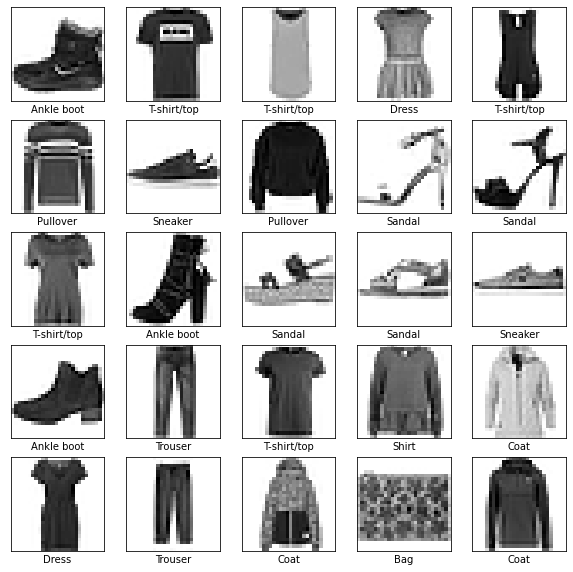

In [ ]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

### Currently the images are too large to be processed effectively. They are currently in a range of 28 * 28=256 -> 0-255. Below is an example of the first image.

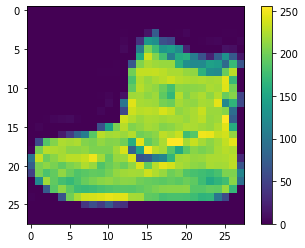

In [ ]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

### The images need to be normalized. Division by 255 will scale these values down to be used by the network.

In [ ]:
train_images = train_images / 255.0
test_images = test_images / 255.0

### Build and Train the RNN
Reccurent Neural Networks derive context from the input images. LSTMs allow the the network to make note of long term dependancies between the sequence of pixels that make an image. LSTMs also deal with vanishing and exploding gradients by employing the gates for memory as well as gates for regularization.

### Model Construction
The model constists of an LSTM layer followed by a dropout layer, Another LSTM layers, another dropout and lastly a Dense layer for each category.

In [ ]:
RNN_model = tf.keras.Sequential([
      tf.keras.layers.LSTM(128, input_shape=(28,28), activation='relu', return_sequences=True),
      tf.keras.layers.Dropout(0.2),
      tf.keras.layers.LSTM(128, activation='relu'),
      tf.keras.layers.Dropout(0.2),
      tf.keras.layers.Dense(10, activation='softmax')
])
RNN_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])
RNN_model.fit(train_images, train_labels, epochs=20)

Epoch 1/20
1875/1875 [==============================] - 116s 61ms/step - loss: 0.6857 - accuracy: 0.7490
Epoch 2/20
1875/1875 [==============================] - 113s 60ms/step - loss: 0.4282 - accuracy: 0.8428
Epoch 3/20
1875/1875 [==============================] - 113s 60ms/step - loss: 0.3750 - accuracy: 0.8625
Epoch 4/20
1875/1875 [==============================] - 113s 60ms/step - loss: 0.3418 - accuracy: 0.8740
Epoch 5/20
1875/1875 [==============================] - 113s 60ms/step - loss: 0.3223 - accuracy: 0.8806
Epoch 6/20
1875/1875 [==============================] - 113s 60ms/step - loss: 0.2980 - accuracy: 0.8887
Epoch 7/20
1875/1875 [==============================] - 113s 60ms/step - loss: 0.2836 - accuracy: 0.8946
Epoch 8/20
1875/1875 [==============================] - 113s 60ms/step - loss: 0.2751 - accuracy: 0.8979
Epoch 9/20
1875/1875 [==============================] - 112s 60ms/step - loss: 0.2579 - accuracy: 0.9021
Epoch 10/20
1875/1875 [==============================] 

### The Network has been trained.
Below is a summary of the dimensionality of this network.

In [ ]:
print(RNN_model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 28, 128)           80384     
                                                                 
 dropout (Dropout)           (None, 28, 128)           0         
                                                                 
 lstm_1 (LSTM)               (None, 128)               131584    
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                                 
 dense (Dense)               (None, 10)                1290      
                                                                 
Total params: 213,258
Trainable params: 213,258
Non-trainable params: 0
_________________________________________________________________
None


### Using the model
After the model has been trained, it needs to be tested for accuracy. Below, the RNN model is turned into a probability model that will be used to classify test images given to it. If the model can get these test images correct, the training has worked and the network will be able to classify more images based on it's training.

In [ ]:
test_loss, test_acc = RNN_model.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)
probability_model = tf.keras.Sequential([RNN_model, 
                                         tf.keras.layers.Softmax()])
predictions = probability_model.predict(test_images)
print('confidence per category', predictions[0])
print('prediction', np.argmax(predictions[0]))
print('ground truth', test_labels[0])

313/313 - 6s - loss: 0.2859 - accuracy: 0.9063 - 6s/epoch - 18ms/step

Test accuracy: 0.9063000082969666
confidence per category [0.08533674 0.08533674 0.08533674 0.08533674 0.08533674 0.08533674
 0.08533674 0.08533676 0.08533674 0.2319693 ]
prediction 9
ground truth 9


### RNN test results
The network has an overall accuracy of 89.77%
Above is a sample of the structures being used in prediction. The prediction array contains a list of probabilities for each category. The max value is the prediction the network has made. The argmax of the prediction array for image 0 in the test set will return 9. Image 0 is item 9 to the network. As shown above this is the ground truth and the network has predicted what the image is correctly.

What did the network get wrong?

Fuctions for displaying graph components

In [ ]:
def plot_image(i, predictions_array, true_label, img):
  true_label, img = true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'
  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                       100*np.max(predictions_array),
                                       class_names[true_label]),
                                        color = color)
def plot_value_array(i, predictions_array, true_label):
  true_label = true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0,1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

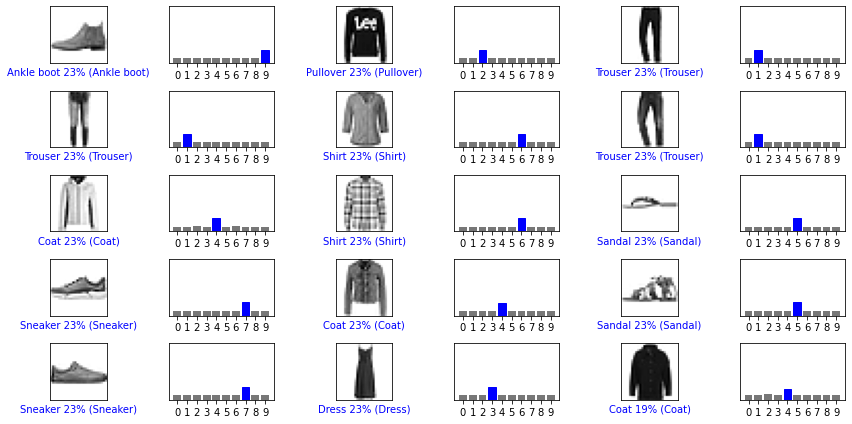

In [ ]:
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_cols))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()

### Test Set Results
The catgeories where the network is correct it is strongly confident in it's answers. Running 20 epochs takes quite awhile but the result is worth it.

### Build and Train the CNN
Convolutional Neural Networks are perfect for classifying images. These networks have been specialized to work with data that has grid-like structure. This lends itself really well to image classification. A CNN takes an image and goes over the matrix of its pixels with a kernel/filter/weight and produces a smaller matrix of values. This smaller matrix is often convolved again to extract finer details. After downsampling several times, the network has produced an array of small, unintelligible images. These collections of smaller images are the set that define a specific image. Connecting these neurons to a dense layer allows the network to develop a deep understanding of the images. Lastly the final layer is a dense layer with 1 neuron for every class. This network is classifying 0-9 classes for the 10 clothing elements. This is best visualized by the graph above. By learning and recognizing these image subsets, the network will learn to classify images based on the defining features of the images. 

In [ ]:
CNN_model = tf.keras.Sequential([
                                 tf.keras.layers.Conv2D(32, (3, 3), activation='relu',
                                                        input_shape=(28, 28, 1)),
                                 tf.keras.layers.MaxPooling2D((2, 2)),
                                 tf.keras.layers.Conv2D(64, (3, 3), activation='relu',
                                                        input_shape=(28, 28, 1)),
                                 tf.keras.layers.MaxPooling2D((2, 2)),
                                 tf.keras.layers.Conv2D(128, (3, 3), activation='relu',
                                                        input_shape=(28, 28, 1)),
                                 tf.keras.layers.MaxPooling2D((2, 2)),
                                 tf.keras.layers.Flatten(),
                                 tf.keras.layers.Dense(256, activation='relu'),
                                 tf.keras.layers.Dense(10, activation="softmax")
])
CNN_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])
CNN_model.fit(train_images, train_labels, epochs=15)

Epoch 1/15
1875/1875 [==============================] - 62s 33ms/step - loss: 0.5641 - accuracy: 0.7929
Epoch 2/15
1875/1875 [==============================] - 62s 33ms/step - loss: 0.3806 - accuracy: 0.8597
Epoch 3/15
1875/1875 [==============================] - 61s 33ms/step - loss: 0.3206 - accuracy: 0.8814
Epoch 4/15
1875/1875 [==============================] - 61s 33ms/step - loss: 0.2852 - accuracy: 0.8938
Epoch 5/15
1875/1875 [==============================] - 61s 33ms/step - loss: 0.2555 - accuracy: 0.9037
Epoch 6/15
1875/1875 [==============================] - 62s 33ms/step - loss: 0.2345 - accuracy: 0.9133
Epoch 7/15
1875/1875 [==============================] - 62s 33ms/step - loss: 0.2146 - accuracy: 0.9194
Epoch 8/15
1875/1875 [==============================] - 62s 33ms/step - loss: 0.1997 - accuracy: 0.9252
Epoch 9/15
1875/1875 [==============================] - 62s 33ms/step - loss: 0.1834 - accuracy: 0.9303
Epoch 10/15
1875/1875 [==============================] - 62s 33m

### The network has been trained.
Below are accuracy metrics for the CNN.

In [ ]:
test_loss, test_acc = CNN_model.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)
CNN_probability_model = tf.keras.Sequential([CNN_model, 
                                         tf.keras.layers.Softmax()])
predictions = CNN_probability_model.predict(test_images)
print('confidence per category', predictions[0])
print('prediction', np.argmax(predictions[0]))
print('ground truth', test_labels[0])

313/313 - 3s - loss: 0.4200 - accuracy: 0.8834 - 3s/epoch - 10ms/step

Test accuracy: 0.883400022983551
confidence per category [0.08533714 0.08533714 0.08533714 0.08533714 0.08533714 0.0853373
 0.08533714 0.0853397  0.08533714 0.23196301]
prediction 9
ground truth 9


#The CNN works well
The overall accuracy is 89.15%. 
Only 10 epochs required to match the RNN's 20 epoch accuracy
This network also correctly classifies the example image. What else did it get right?

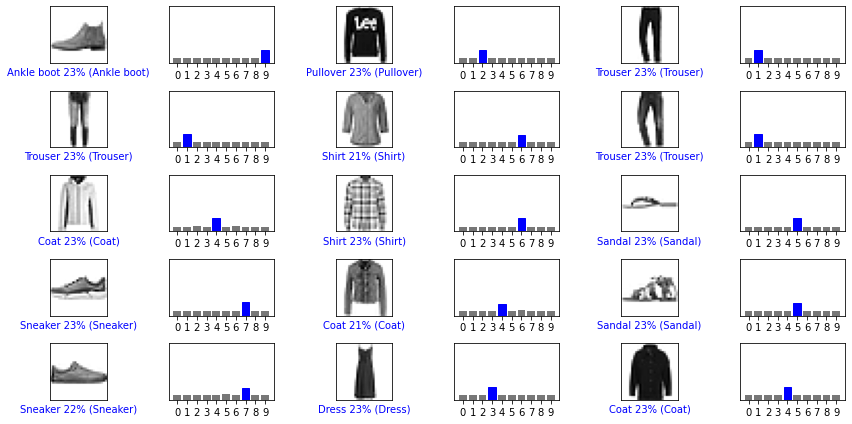

In [ ]:
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_cols))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()

### It got everything correct
The network has performed beautifully, it correctly classifies all test images.

## Performance Comparison
In 20 epochs looking at 1,875 batches of 32 images each epoch, the RNN has an overall accuracy of 90.63%.
In 15 epochs looking at the same 1,875 batch of 32 images each epoch, the CNN has an overall accuracy of 88.34%
Both networks classify all of the test images correctly.

In terms of time the CNN takes fewer epochs and less time per epoch to complete it's training. However, the accuracy is fairly low compared to the accuracy of the RNN. Once again, both networks get all of the test images correctly. The computational difference at this level is not very noticable. The RNN takes marginally more time to complete than the CNN. With more data perhaps this gap grows larger. The CNN learns very fast with a lower accuracy and is still robust in classifying the test images. Both networks appear to complete this task effectively.

### Using CNNs and RNNs together

RNN are very adept at finding long term dependencies in data with sequence semantics. This allows the RNN to be really skilled at language modelling. For this case language modeling is very useful because it will allow the network to model dependencies among labels. For instance if you find a boat you might also expect water or fisherman. RNNs would allow this network to recognize such dependencies and give these more likely labels more weight.
 
CNNs are fantastic at image classification. In the above tests, the CNN is able to achieve the same performance with less epochs and less time. CNNs work very well against data that has a matrix format. Images can be represented as matrices so CNN works very well. By convoluting over an image the CNN will be able to tell what is in the image with high accuracy. At a low enough level the CNN will be unsure of where anything is in the image. It will just know what is in the image. For example in a "dog jumping over a puddle" image, a CNN would recognize the dog and the puddle but it would have trouble understanding the action the dog is doing. It is unaware of the position of anything in the image. The image could be a 'dog laying in a puddle','dog's reflection in a puddle', etc . CNN does not do well here. 
 
Using these technologies together in a network will create a network that can perform label prediction for more complex images. Think of a picture of a "dog jumping over a puddle". The CNN convolutes the image of the dog and puddle and could identify the dog and puddle but might lose context on the rest of the image. CNNs know what is in the picture but not exactly where. By using an additional RNN layer to provide context and inference on the label the network could be better at identifying the finer details like the dogs action in the image.
 
In this combination network, the CNN will be in charge of convoluting the image representation. The RNN will be fed information on labels and the previous label predictions. After these processes are finished the outputs will be combined to make predictions. For example, if the CNN sees a dog and a puddle and the RNN is aware that the previous prediction of "Dog laying in a puddle" was incorrect it might then weigh towards "dog jumping over a puddle". Together they will create a network that has strong recognition capabilities as well as strong label dependency analysis.
 
In this: https://openaccess.thecvf.com/content_cvpr_2016/papers/Wang_CNN-RNN_A_Unified_CVPR_2016_paper.pdf paper, combining the both networks into a single network has created a network that can model joint image/label embedding and label co-occurrence with dependencies. In the proposed framework a picture of "Dog jumping over a puddle" would be easily identifiable.


 
